### Загрузка данных

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Salaries.csv")
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


### Переименование и удаление столбцов

In [3]:
# неверно
df.rename({"yrs.since.phd" : "phd", "yrs.service" : "service"})

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [4]:
# неверно
df.rename(columns = {"yrs.since.phd" : "phd", "yrs.service" : "service"})

,Unnamed: 0,rank,discipline,phd,service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [6]:
# верно
df.rename(columns = {"yrs.since.phd" : "phd", "yrs.service" : "service"}, inplace = True)
df.head()

,Unnamed: 0,rank,discipline,phd,service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [7]:
# удаление

df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


### Выбор строк и столбцов по индексу/названию

In [8]:
# выбор ячейки по индексам

df.iloc[1, 2]

20

In [9]:
# возможна замена

df.iloc[1, 2] = 21

In [10]:
# выбор строки по индексу

df.iloc[1, :]

rank            Prof
discipline         B
phd               21
service           16
sex             Male
salary        173200
Name: 1, dtype: object

In [11]:
# выбор отдельного столбца из выбранной строки

df.iloc[1, :]["rank"]

'Prof'

In [12]:
# выбор столбца по индексу

df.iloc[:, 4]

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
392    Male
393    Male
394    Male
395    Male
396    Male
Name: sex, Length: 397, dtype: object

In [13]:
# срезы с iloc

df.iloc[0:5, 2:5]

,phd,service,sex
0,19,18,Male
1,21,16,Male
2,4,3,Male
3,45,39,Male
4,40,41,Male


In [14]:
# выбор ячейки по названию

df.loc[3, "phd"]

45

In [15]:
# выбор строки по названию

df.loc[3, :]

rank            Prof
discipline         B
phd               45
service           39
sex             Male
salary        115000
Name: 3, dtype: object

In [16]:
# выбор столбца по названию

df.loc[:, "service"]

0      18
1      16
2       3
3      39
4      41
       ..
392    30
393    19
394    25
395    15
396     4
Name: service, Length: 397, dtype: int64

In [17]:
# срезы с loc

df.loc[:, "phd" : "sex"]

,phd,service,sex
0,19,18,Male
1,21,16,Male
2,4,3,Male
3,45,39,Male
4,40,41,Male
...,...,...,...
392,33,30,Male
393,31,19,Male
394,42,25,Male
395,25,15,Male


### Фильтрация строк

In [18]:
# выбор строк по условиям

df[(df["service"] > 20) & (df["sex"] == "Female")]

,rank,discipline,phd,service,sex,salary
19,Prof,A,39,36,Female,137000
48,Prof,B,25,25,Female,140096
123,AssocProf,A,25,22,Female,62884
148,Prof,B,36,26,Female,144651
230,Prof,A,29,27,Female,91000
231,AssocProf,A,26,24,Female,73300


In [19]:
# проверка вхождения значений в список

df[df["rank"].isin(["Prof", "AssocProf"])]

,rank,discipline,phd,service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,21,16,Male,173200
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
...,...,...,...,...,...,...
391,Prof,A,30,19,Male,151292
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738


In [20]:
# проверка частичных совпадений
# проверка совпадений через регулярные выражения
# help(df["rank"].str.contains)

df[df["rank"].str.contains("prof", case = False)]

,rank,discipline,phd,service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,21,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [36]:
df[df["rank"].str.contains("As.+f$")]

,Unnamed: 0,rank,discipline,phd,service,sex,salary
2,3,AsstProf,B,4,3,Male,79750
5,6,AssocProf,B,6,6,Male,97000
10,11,AssocProf,B,12,8,Male,119800
11,12,AsstProf,B,7,2,Male,79800
12,13,AsstProf,B,1,1,Male,77700
...,...,...,...,...,...,...,...
377,378,AsstProf,A,6,3,Male,77081
379,380,AssocProf,A,11,8,Male,104121
380,381,AsstProf,A,8,3,Male,75996
382,383,AssocProf,A,8,5,Male,86895


### Добавление новых столбцов

In [21]:
# одинаковые значения

df["version"] = "v.01"
df.head()

,rank,discipline,phd,service,sex,salary,version
0,Prof,B,19,18,Male,139750,v.01
1,Prof,B,21,16,Male,173200,v.01
2,AsstProf,B,4,3,Male,79750,v.01
3,Prof,B,45,39,Male,115000,v.01
4,Prof,B,40,41,Male,141500,v.01


In [22]:
# преобразованные значения

df["salary_th"] = df["salary"] / 1000
df.head()

,rank,discipline,phd,service,sex,salary,version,salary_th
0,Prof,B,19,18,Male,139750,v.01,139.75
1,Prof,B,21,16,Male,173200,v.01,173.20
2,AsstProf,B,4,3,Male,79750,v.01,79.75
3,Prof,B,45,39,Male,115000,v.01,115.00
4,Prof,B,40,41,Male,141500,v.01,141.50


In [23]:
# бинарный столбец

df["female"] = (df["sex"] == "Female").astype(int)
df["female"].value_counts()

0    358
1     39
Name: female, dtype: int64

In [24]:
# столбец с двумя значениями

df["course"] = df["discipline"].apply(lambda x: "Theory" if x == "A" else "Practice")
df.head()

,rank,discipline,phd,service,sex,salary,version,salary_th,female,course
0,Prof,B,19,18,Male,139750,v.01,139.75,0,Practice
1,Prof,B,21,16,Male,173200,v.01,173.20,0,Practice
2,AsstProf,B,4,3,Male,79750,v.01,79.75,0,Practice
3,Prof,B,45,39,Male,115000,v.01,115.00,0,Practice
4,Prof,B,40,41,Male,141500,v.01,141.50,0,Practice


In [25]:
# столбец с несколькими значениями по условиям

def get_num_rank(x):
    if x == "Prof":
        y = 1
    elif x == "AssocProf":
        y = 2
    elif x == "AsstProf":
        y = 3
    else:
        y = None
    return y

df["rank_num"] = df["rank"].apply(get_num_rank)
df.head()

,rank,discipline,phd,service,sex,salary,version,salary_th,female,course,rank_num
0,Prof,B,19,18,Male,139750,v.01,139.75,0,Practice,1
1,Prof,B,21,16,Male,173200,v.01,173.20,0,Practice,1
2,AsstProf,B,4,3,Male,79750,v.01,79.75,0,Practice,3
3,Prof,B,45,39,Male,115000,v.01,115.00,0,Practice,1
4,Prof,B,40,41,Male,141500,v.01,141.50,0,Practice,1


In [26]:
D = {"Prof" : 1, "AssocProf" : 2, "AsstProf" : 3}
df["rank_new"] = df["rank"].map(D)

df.head()

,rank,discipline,phd,service,sex,salary,version,salary_th,female,course,rank_num,rank_new
0,Prof,B,19,18,Male,139750,v.01,139.75,0,Practice,1,1
1,Prof,B,21,16,Male,173200,v.01,173.20,0,Practice,1,1
2,AsstProf,B,4,3,Male,79750,v.01,79.75,0,Practice,3,3
3,Prof,B,45,39,Male,115000,v.01,115.00,0,Practice,1,1
4,Prof,B,40,41,Male,141500,v.01,141.50,0,Practice,1,1


In [27]:
# набор дамми-переменных
# one-hot encoding

new = pd.get_dummies(df["rank"])
new.head()

,AssocProf,AsstProf,Prof
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [28]:
df = pd.concat([df, new], axis = 1)
df.head()

,rank,discipline,phd,service,sex,salary,version,salary_th,female,course,rank_num,rank_new,AssocProf,AsstProf,Prof
0,Prof,B,19,18,Male,139750,v.01,139.75,0,Practice,1,1,0,0,1
1,Prof,B,21,16,Male,173200,v.01,173.20,0,Practice,1,1,0,0,1
2,AsstProf,B,4,3,Male,79750,v.01,79.75,0,Practice,3,3,0,1,0
3,Prof,B,45,39,Male,115000,v.01,115.00,0,Practice,1,1,0,0,1
4,Prof,B,40,41,Male,141500,v.01,141.50,0,Practice,1,1,0,0,1


### Группировка и агрегирование

In [29]:
df.groupby("sex")

In [57]:
# print(*df.groupby("sex"))

In [30]:
for name, data in df.groupby("sex"):
    data.to_csv(name + ".csv")

In [31]:
df.groupby("sex")["service"].mean()

sex
Female    11.564103
Male      18.273743
Name: service, dtype: float64

In [32]:
df.groupby("sex")[["service", "salary"]].mean()

,service,salary
sex,,
Female,11.564103,101002.410256
Male,18.273743,115090.418994


In [33]:
df.groupby(["sex", "discipline"])[["service", "salary"]].mean()

service         salary
sex    discipline                          
Female A           11.444444   89064.944444
       B           11.666667  111234.523810
Male   A           20.889571  110699.981595
       B           16.087179  118760.374359

In [34]:
df.groupby(["sex", "discipline"])[["service", "salary"]].describe()

service                                                    \
                    count       mean        std  min  25%   50%   75%   max   
sex    discipline                                                             
Female A             18.0  11.444444  10.478113  0.0  3.0   8.0  18.0  36.0   
       B             21.0  11.666667   7.364328  0.0  6.0  10.0  17.0  26.0   
Male   A            163.0  20.889571  13.690587  0.0  8.0  19.0  30.5  57.0   
       B            195.0  16.087179  12.443588  0.0  5.5  15.0  23.0  60.0   

                  salary                                                 \
                   count           mean           std      min      25%   
sex    discipline                                                         
Female A            18.0   89064.944444  21638.580595  62884.0  73350.0   
       B            21.0  111234.523810  25367.239751  71065.0  97032.0   
Male   A           163.0  110699.981595  30663.119265  57800.0  87347.5   
       B           195.0  118760.374359  29831.315448  67559.0  94731.5   

                                                 
                        50%       75%       max  
sex    discipline                                
Female A            78000.0  108484.5  137000.0  
       B           105450.0  127512.0  161101.0  
Male   A           105260.0  127950.0  205500.0  
       B           113600.0  141318.0  231545.0

In [35]:
df.groupby(["sex", "discipline"])[["service", "salary"]].agg(["mean", "median"])

service                salary          
                        mean median           mean    median
sex    discipline                                           
Female A           11.444444    8.0   89064.944444   78000.0
       B           11.666667   10.0  111234.523810  105450.0
Male   A           20.889571   19.0  110699.981595  105260.0
       B           16.087179   15.0  118760.374359  113600.0

In [64]:
df.groupby(["sex", "discipline"])[["service", "salary"]].agg(["count", "mean", "median"])

service                   salary                         
                    count       mean median  count           mean    median
sex    discipline                                                          
Female A               18  11.444444    8.0     18   89064.944444   78000.0
       B               21  11.666667   10.0     21  111234.523810  105450.0
Male   A              164  20.859756   19.0    164  111081.079268  105464.0
       B              194  16.087629   14.5    194  118479.757732  113499.0

In [36]:
df.groupby("discipline").agg({"salary" : "median", "service" : "mean"})

,salary,service
discipline,,
A,104350.0,19.950276
B,113018.5,15.657407


In [37]:
df.groupby("discipline")["salary"].agg(lambda x: max(x) - min(x))

discipline
A    147700
B    163986
Name: salary, dtype: int64

### Немного графики

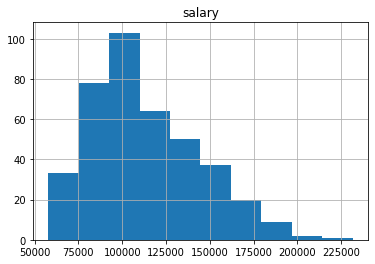

In [39]:
df.hist("salary");

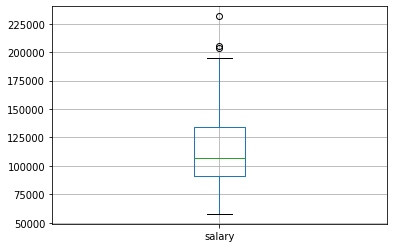

In [40]:
df.boxplot("salary");

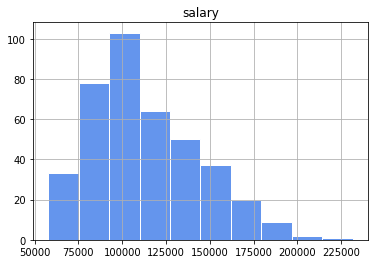

In [41]:
df.hist("salary", color = "cornflowerblue", edgecolor = "white");

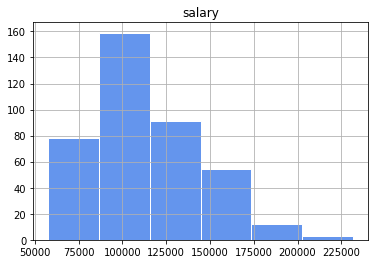

In [42]:
df.hist("salary", color = "cornflowerblue", edgecolor = "white", bins = 6);

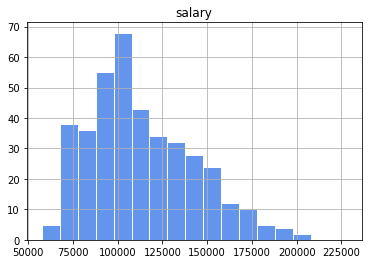

In [43]:
start = df["salary"].min()
end = df["salary"].max() + 10

df.hist("salary", 
        color = "cornflowerblue", 
        edgecolor = "white", 
        bins = range(start, end, 10000));

In [44]:
from matplotlib import pyplot as plt

In [45]:
x = df["salary"].values

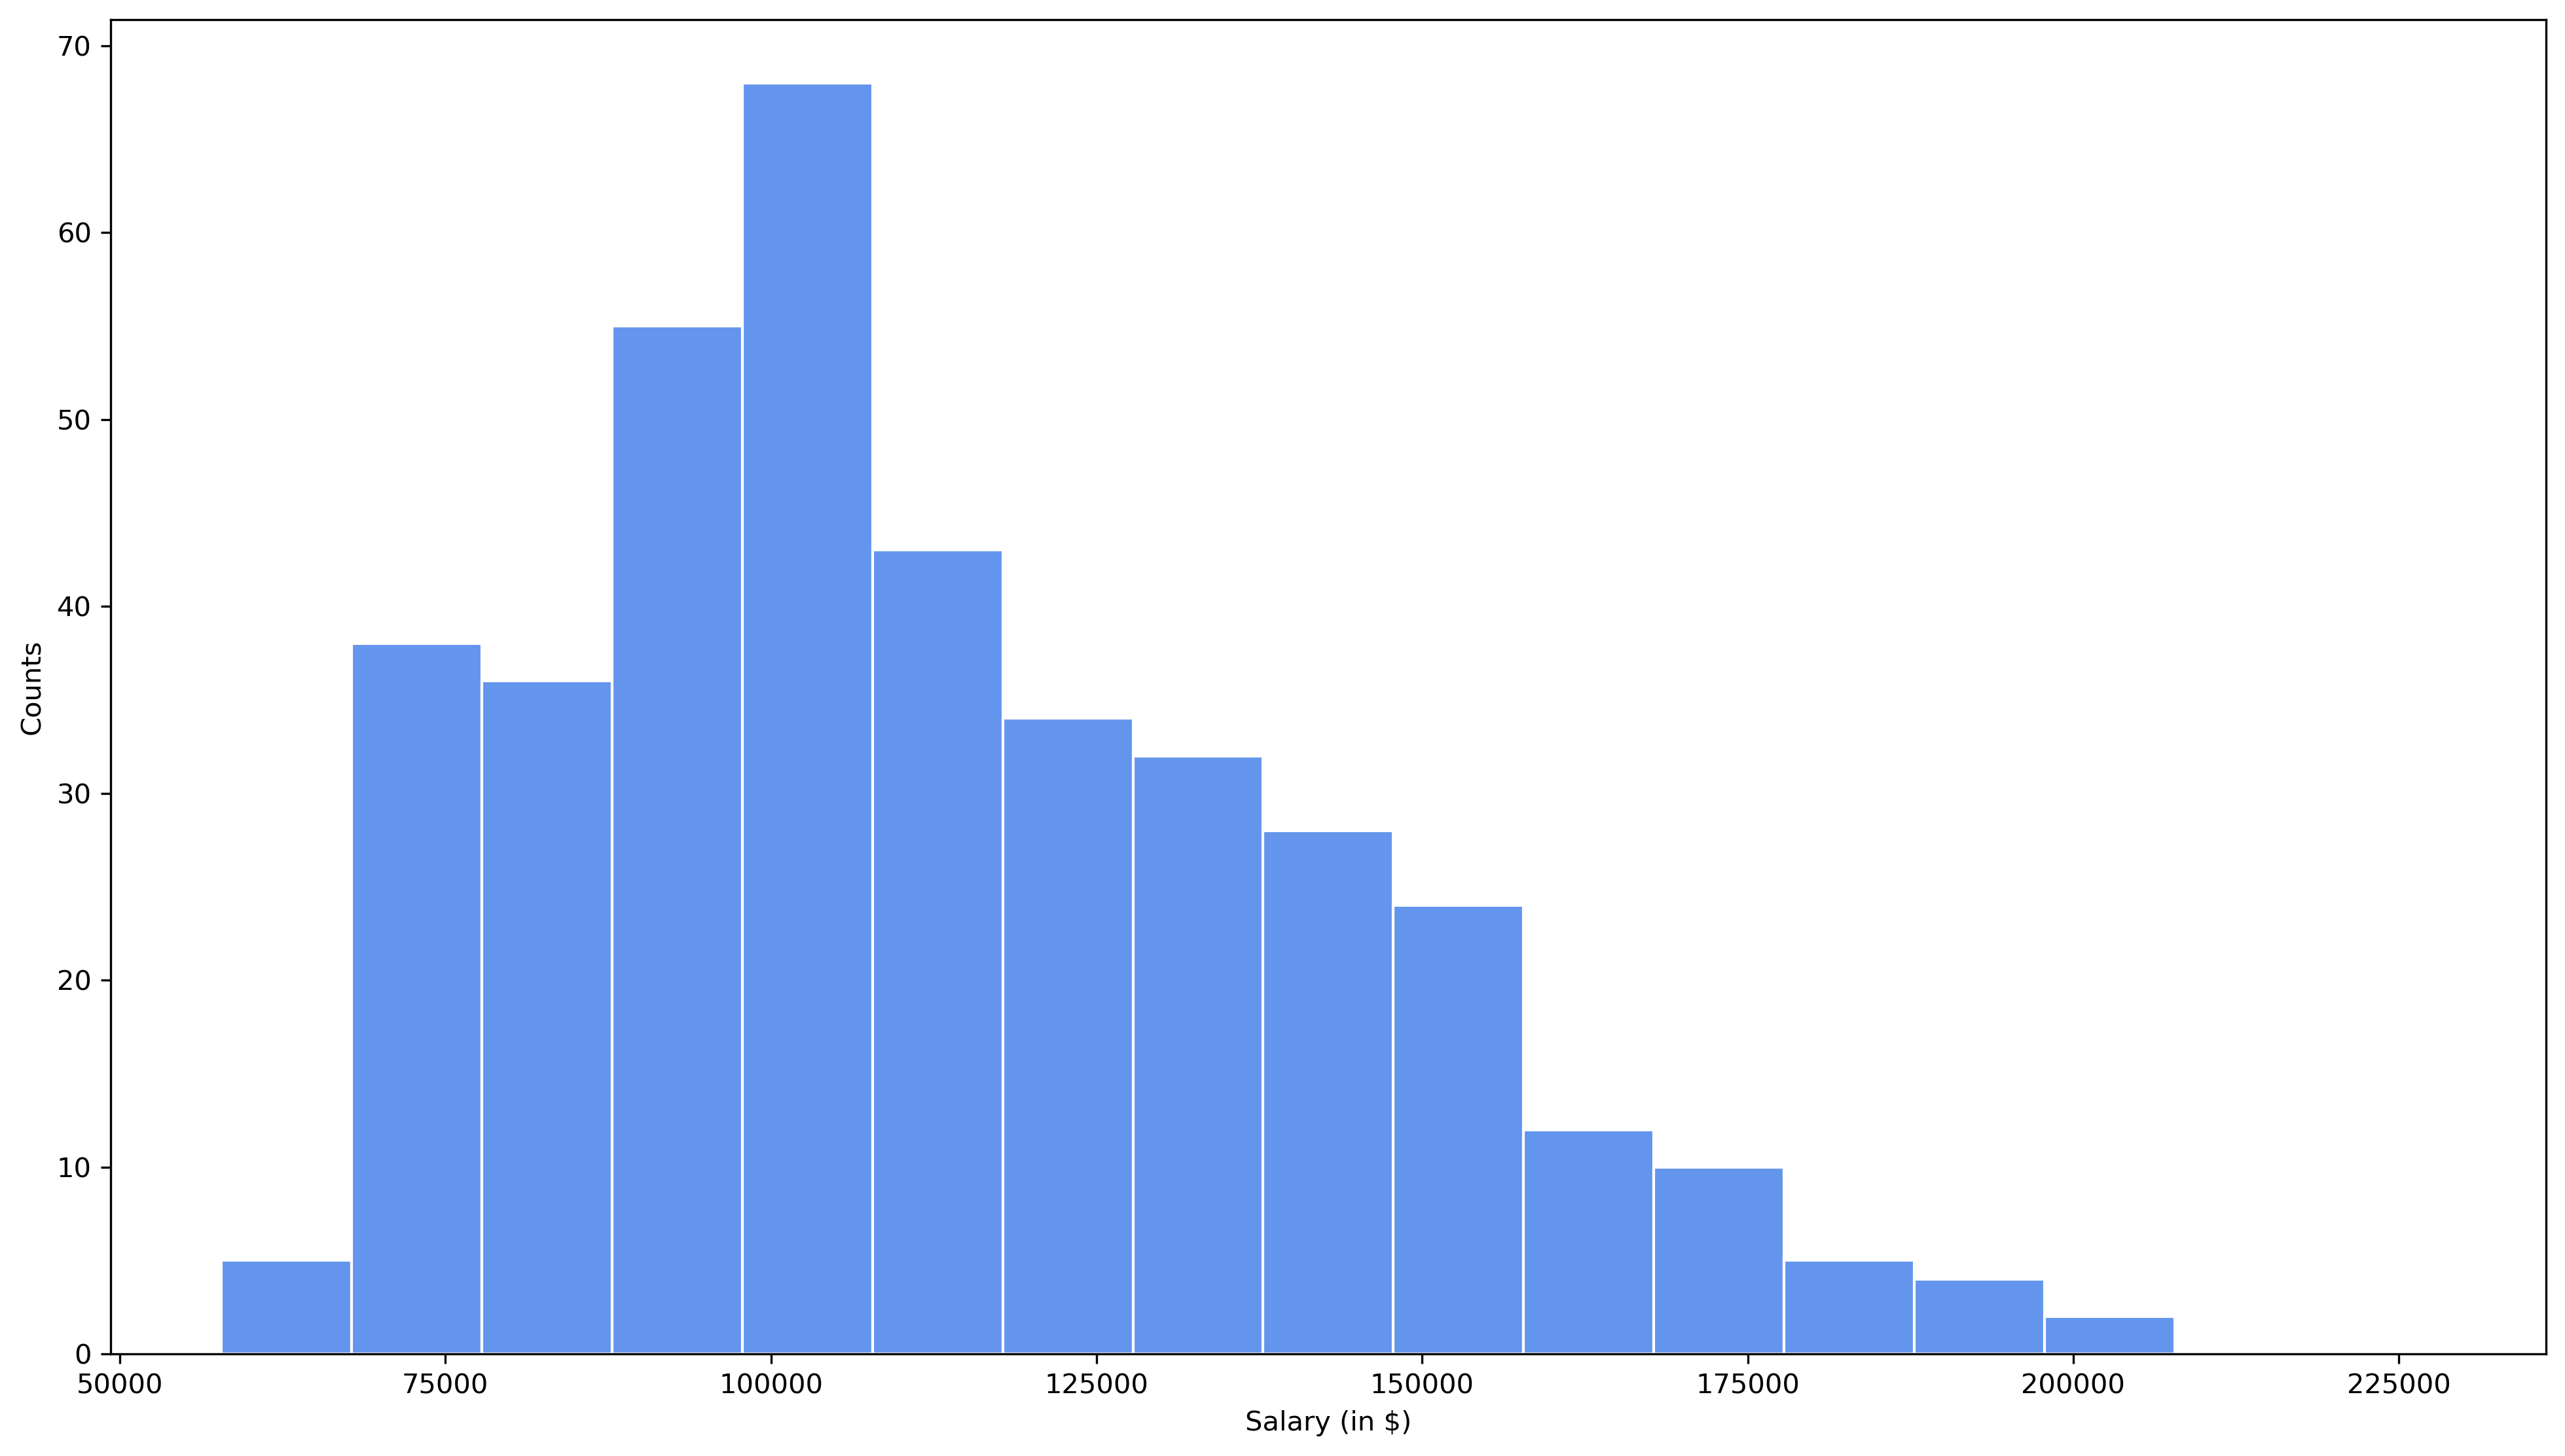

In [46]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)
ax.hist(x, 
        color = "cornflowerblue", 
        edgecolor = "white", 
        bins = range(start, end, 10000));
ax.set_xlabel("Salary (in $)");
ax.set_ylabel("Counts");

fig.savefig("salary_hist.png")